# find best classifier

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-02-14 14:46:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-02-14 14:47:00 (62.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [233]:
df = pd.read_csv("loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [234]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [235]:
df["education"].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [236]:
df["Principal"].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

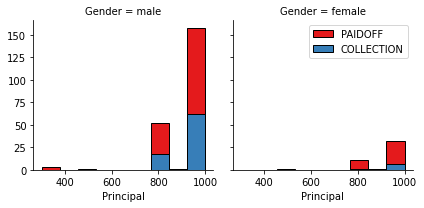

In [237]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

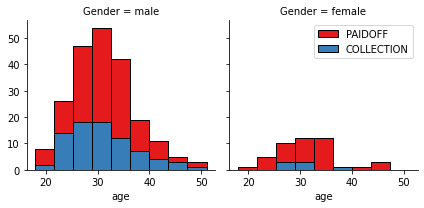

In [238]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Clearing Dataframe

In [239]:
df = df.drop("effective_date",axis=1).drop("due_date",axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,age,education,Gender
0,0,0,PAIDOFF,1000,30,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,27,college,male
3,4,4,PAIDOFF,1000,30,28,college,female
4,6,6,PAIDOFF,1000,30,29,college,male


In [240]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder().fit(df.Gender)
df.Gender = gender_encoder.transform(df.Gender)

edu_encoder = LabelEncoder().fit(df.education)
df.education = edu_encoder.transform(df.education)

loan_encoder = LabelEncoder().fit(df.loan_status)
df.loan_status = loan_encoder.transform(df.loan_status)

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,age,education,Gender
0,0,0,1,1000,30,45,1,1
1,2,2,1,1000,30,33,0,0
2,3,3,1,1000,15,27,3,1
3,4,4,1,1000,30,28,3,0
4,6,6,1,1000,30,29,3,1


In [241]:
from sklearn.preprocessing import StandardScaler

X = np.asarray(df.drop("loan_status", axis=1))
y = np.asarray(df["loan_status"])

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X


array([[-1.75351563, -1.75351563,  0.51578458, ...,  2.33152555,
        -0.64691859,  0.42056004],
       [-1.73616849, -1.73616849,  0.51578458, ...,  0.34170148,
        -1.5212695 , -2.37778177],
       [-1.72749491, -1.72749491,  0.51578458, ..., -0.65321055,
         1.10178323,  0.42056004],
       ...,
       [ 1.68989272,  1.68989272, -1.31458942, ...,  1.33661351,
         1.10178323,  0.42056004],
       [ 1.69856629,  1.69856629,  0.51578458, ..., -0.48739188,
         1.10178323,  0.42056004],
       [ 1.70723986,  1.70723986,  0.51578458, ..., -0.81902922,
         1.10178323,  0.42056004]])

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# create models

## KNN

In [243]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

f1 = list()

for x in range(3, 20):
    knn = KNeighborsClassifier(n_neighbors=x).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    f1.append(accuracy_score(y_test, yhat))   
    
knn = KNeighborsClassifier(n_neighbors=f1.index(max(f1)) + 3).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=10)

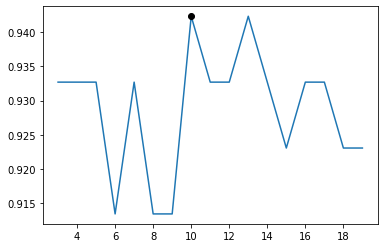

In [244]:
plt.plot(range(3,20), f1)
plt.plot(f1.index(max(f1)) + 3, max(f1), 'ok')

## Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier

criterions = ["gini", "entropy"]
splitters = ["best", "random"]

tree_name = list()
tree_value = list()

#ans.append([[criterion, splitter], f1_score(y_test, y_hat)])

for criterion in criterions:
    for splitter in splitters:
        tree = DecisionTreeClassifier(criterion=criterion, splitter=splitter).fit(X_train, y_train)
        yhat = tree.predict(X_test)
        tree_name.append(criterion + '-' + splitter)
        tree_value.append(f1_score(y_test, yhat))
name = tree_name[tree_value.index(max(tree_value))].split('-')        
tree = DecisionTreeClassifier(criterion=name[0], splitter=name[1]).fit(X_train, y_train)
tree_value

[1.0, 1.0, 1.0, 1.0]

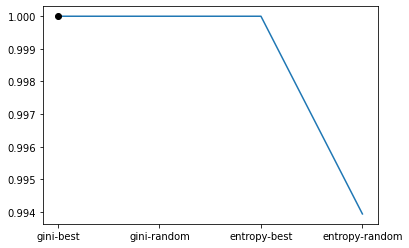

In [246]:
plt.plot(ans_name,ans_value)
plt.plot(tree_name[tree_value.index(max(tree_value))], max(tree_value), 'ok')

## Support Vector Machine

In [247]:
from sklearn.svm import SVC

kernels = ['poly','linear', 'rbf', 'sigmoid']

svm_name = list()
svm_value = list()

for kernel in kernels:
    svm = SVC(kernel=kernel).fit(X_train,y_train)
    yhat = svm.predict(X_test)
    svm_name.append(kernel)
    svm_value.append(f1_score(y_test, yhat))

svm = SVC(kernel=svm_name[svm_value.index(max(svm_value))]).fit(X_train,y_train)
svm_value

[0.9700598802395209, 0.993939393939394, 0.9761904761904763, 0.9876543209876543]

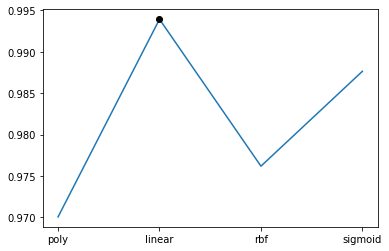

In [248]:
plt.plot(svm_name, svm_value)
plt.plot(svm_name[svm_value.index(max(svm_value))], max(svm_value), 'ok')

## Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']

LR_name = list()
LR_value = list()

for solver in solvers:
    LR = LogisticRegression(solver=solver).fit(X_train, y_train)
    yhat = LR.predict(X_test)
    LR_name.append(solver)
    LR_value.append(f1_score(y_test, yhat))

LR = LogisticRegression(solver=LR_name[LR_value.index(max(LR_value))]).fit(X_train, y_train)    
LR_value

[0.993939393939394, 0.993939393939394, 0.9878048780487805, 0.993939393939394]

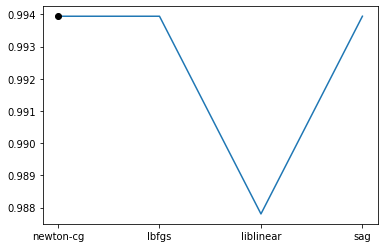

In [250]:
plt.plot(LR_name, LR_value)
plt.plot(LR_name[LR_value.index(max(LR_value))], max(LR_value), 'ok')

# Model Evaluation using Test set

In [251]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score

In [252]:
yhat = knn.predict(X_test)
fs1 = f1_score(y_test, yhat)
js1 = jaccard_score(y_test, yhat)

yhat = tree.predict(X_test)
fs2 = f1_score(y_test, yhat)
js2 = jaccard_score(y_test, yhat)

yhat = svm.predict(X_test)
fs3 = f1_score(y_test, yhat)
js3 = jaccard_score(y_test, yhat)

yhat = LR.predict(X_test)
fs4 = f1_score(y_test, yhat)
js4 = jaccard_score(y_test, yhat)
ll4 = log_loss(y_test, yhat)

list_fs = [fs1, fs2, fs3, fs4]
list_js = [js1, js2, js3, js4]
list_ll = [np.nan, np.nan, np.nan, ll4]

df = pd.DataFrame(list_js, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ["Jaccard"]
df.insert(loc=1, column='f1_score', value=list_fs)
df.insert(loc=2, column='log_loss', value=list_ll)

df

,Jaccard,f1_score,log_loss
KNN,0.931818,0.964706,NaN
Decision Tree,1.000000,1.000000,NaN
SVM,0.987952,0.993939,NaN
Logistic Regression,0.987952,0.993939,0.332111
